<a href="https://colab.research.google.com/github/EstebanExplorer/Ejercicio-Notas-Academicas/blob/lab5/Copia_de_Taller_de_arboles_y_recursi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER DE RECURSION Y ARBOLES

Adaptación por Diana Margot López de material de RRamos y RFlorez.

Profundizar el cononocimiento en la estructura de árbol y de árbol binario, su representación y forma de manipularlos.
Un árbol es un conjunto de registros (*n*>0, árbol vacío no está definido), tales que hay un registro especial llamado raíz y los demás registros están particionados en conjuntos disjuntos, cada uno de los cuales es también un árbol.

De la definición se desprende que un árbol es una estructura recursiva, además cada registro se podrá considerar como la raíz de un sub-árbol. Es decir, un árbol está compuesto de árboles. Un ejemplo de un árbol se presenta en la figura siguiente:


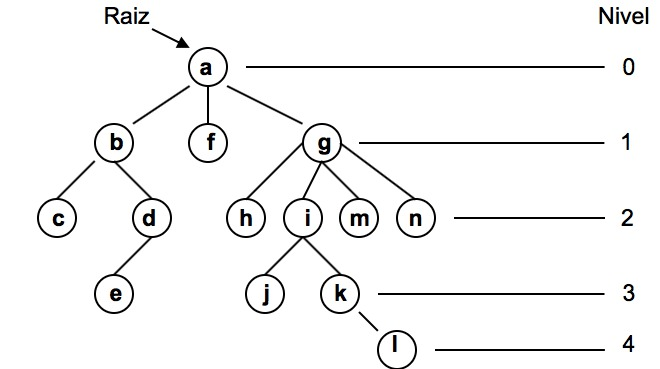

En esta figura se tiene el árbol cuya raíz es a. Dicho árbol está compuesto por el árbol cuya raíz es b, el árbol cuya raíz es f y el árbol cuya raíz es g. A su vez, b está compuesto por el árbol cuya raíz es c y el árbol cuya raíz es d. Y así sucesivamente. Es supremamente importante entender esta parte de la definición.

# **Terminología**
Las ramificaciones de cada nodo o registro suelen llamarse hijos y los nodos de los cuales salen las ramificaciones se llaman padres. Los registros que tienen un mismo padre se denominan hermanos.

Grado de un registro: Es el número de ramificaciones que salen de ese registro. En el ejemplo de la figura se tiene: a tiene grado 3, b tiene grado 2, j tiene grado 0.

Grado de un árbol: Es el máximo grado de cualquier registro del árbol. El árbol de la figura anterior tiene grado 4, ya que el registro que contiene la g tiene grado 4 y es el registro que mayor grado tiene..

Hojas: Son los registros con grado cero (registros que no tienen hijos). En el árbol de la figura anterior las hojas son los registros que tienen los datos f, c, h, m, n, e, j, l.

A la raíz se le asigna el nivel 0, a sus hijos el nivel 1, a sus nietos el nivel 2 y así sucesivamente.

Para un registro que se halle en un nivel i cualquiera, su padre se halla en el nivel i – 1, y sus hijos en el nivel i + 1.

Altura de un Arbol: Es el máximo nivel de cualquier registro del árbol. En el ejemplo de la figura anterior la altura es 4 ya que el registro que tiene la l está en el nivel 4 y ese es el máximo nivel del árbol.

Ancestros de un Registro x: Son todos los registros en la trayectoria desde la raíz hasta x. Los ancestros de d son a, b y d.

En general, los árboles en los cuales cualquier registro puede tener cualquier cantidad de hijos, se denominan árboles n-arios.

Adicionalmente, cada nodo puede contenter un dato. Los nodos hoja tienen necesariamente que contenter un dato.

Construcción
Creemos una estructura básica para construir árboles. Observa la recursividad en la función to_indented_string

In [ ]:
class TreeNode1(object):

    def __init__(self, value=None):
        self.value = value
        self.children = []

    def add_child(self, node):
        self.children.append(node)
        return self

    def to_indented_string(self, level):
        s = " "*level*2 + str(self.value)+"\n"
        if len(self.children)>0:
            s += "".join([i.to_indented_string(level+1) for i in self.children])
        return s

    def __repr__(self):
        return self.to_indented_string(level=0)

In [ ]:
t = TreeNode1(1).add_child(TreeNode1(11).add_child(TreeNode1(111)).add_child(TreeNode1(112))).add_child(TreeNode1(12))
t

1
  11
    111
    112
  12

In [ ]:
t = TreeNode1("a").\
        add_child(TreeNode1("b").\
            add_child(TreeNode1("c")).\
            add_child(TreeNode1("d").\
              add_child(TreeNode1("e")))).\
        add_child(TreeNode1("f")).\
        add_child(TreeNode1("g").\
            add_child(TreeNode1("h")).\
            add_child(TreeNode1("i").\
              add_child(TreeNode1("j")).
              add_child(TreeNode1("k").\
                add_child(TreeNode1("l")))).\
            add_child(TreeNode1("m")).\
            add_child(TreeNode1("n")))
t

a
  b
    c
    d
      e
  f
  g
    h
    i
      j
      k
        l
    m
    n

# **Operaciones**
creamos varios métodos recursivos:

para contar el número de hojas
para calcular la altura del árbol
para calcular el grado del árbol

In [ ]:
class TreeNode2(TreeNode1):

    def count_leaves(self):
        if len(self.children)==0:
            return 1
        return sum([i.count_leaves() for i in self.children])

    def height(self):
        import numpy as np
        if len(self.children)==0:
            return 0
        return np.max([i.height() for i in self.children])+1

    def grade(self):
        import numpy as np
        return np.max([len(self.children)]+[i.grade() for i in self.children])

**Prueba**

In [8]:
t = TreeNode2(1).add_child(TreeNode2(11).add_child(TreeNode2(111)).add_child(TreeNode2(112))).add_child(TreeNode2(12))
print(t)
print("nb leaves", t.count_leaves())
print("height   ", t.height())
print("grade    ", t.grade())

1
  11
    111
    112
  12

nb leaves 3
height    2
grade     2


In [ ]:
t = TreeNode2("a").\
        add_child(TreeNode2("b").\
            add_child(TreeNode2("c")).\
            add_child(TreeNode2("d").\
              add_child(TreeNode2("e")))).\
        add_child(TreeNode2("f")).\
        add_child(TreeNode2("g").\
            add_child(TreeNode2("h")).\
            add_child(TreeNode2("i").\
              add_child(TreeNode2("j")).
              add_child(TreeNode2("k").\
                add_child(TreeNode2("l")))).\
            add_child(TreeNode2("m")).\
            add_child(TreeNode2("n")))

***Implementa la prueba***


---

✈

In [ ]:
??

# **Árboles binarios**
Un árbol binario es un conjunto de n registros ( n≥0 ), el cual, puede ser vacío o constar de una raíz y los demás registros particionados en dos conjuntos disjuntos, cada uno de los cuales es un árbol binario (definición recursiva), que se conocen como sub-árbol izquierdo y sub-árbol derecho. El siguiente es un ejemplo:

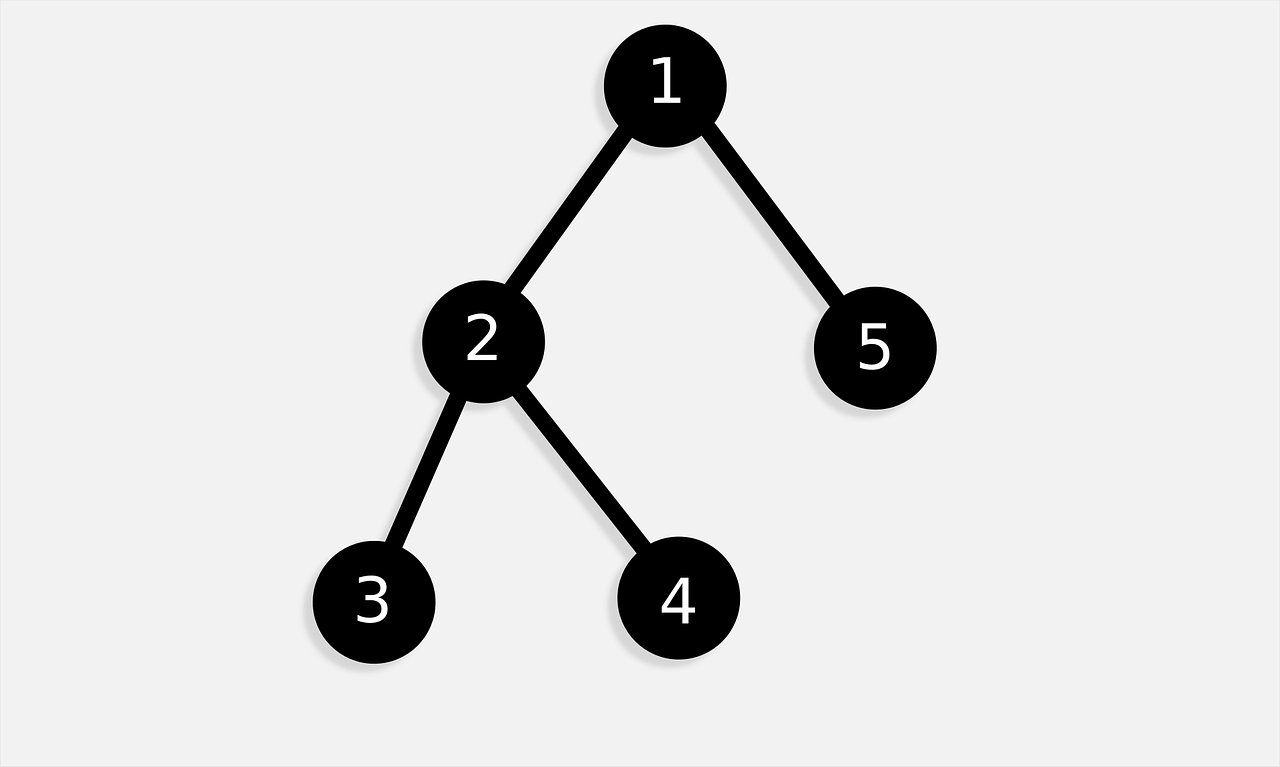

**Propiedades**

El máximo número de registros en un nivel  n  cualquiera es  2n

Para un árbol binario de altura  k  el máximo número de registros es  2k+1–1

Arbol Lleno: Es un árbol binario de altura  k  que tiene  2k+1–1  registros.

Sea

n0  = Número de hojas del árbol (registros con grado 0).

n2  = Número de registros con grado 2.

En un árbol lleno se cumple que  n0=n2+1 . En el ejemplo de la figura 11.1  n2=7  y  n0=8

Representación como vector

Podemos representar un árbol binario con un vector, ya que cualquier nivel tiene un número de nodos conocido. Por ejemplo el árbol anterior

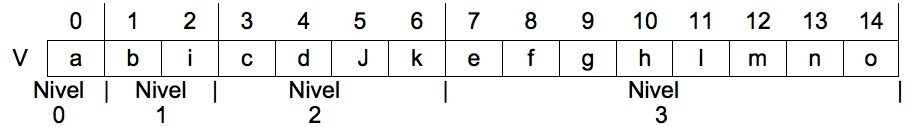

Observa que:

- si algún nodo sólo tiene un hijo, el faltante se representará como `None`
- el último nivel ha de tener $2^{k-1}$ valores (con $k$: la altura del árbol)
- si el último nivel tiene menos valores se asumen los faltantes como `None`

**Propiedades de la Representación de un Árbol Binario en un Vector**

Para un registro en la posición $i$ del vector:
    
- Su nivel es

$$level(i) = \text{max}\;n\;\Big |\;\sum_{j=0}^n 2^j < i$$

- Su padre se halla en la posición $\frac{i-1}{2}$ del vector ($i  \ge  1$ división entera)

- Su hijo izquierdo se halla en  la  posición $2i+1$ (siempre y cuando $i$ no sea hoja).

- Su hijo derecho se halla en la posición $2i + 2$ (siempre y cuando $i$ no sea hoja).

In [ ]:
import numpy as np
class VBinTree(object):

    def __init__(self, v):
        self.v = v

    def get_height(self):
        i,c=0,0
        while c<len(self.v):
            c += 2**i
            i += 1
        return i-1

    def get_level(self, i):
        n = 0
        while sum([2**j for j in range(n)])<=i:
            n+=1
        return n-1

    def get_children_positions(self, i):
        return (2*i+1 if 2*i+1<len(self.v) else None,\
                2*i+2 if 2*i+2<len(self.v) else None)

    def get_parent_position(self, i):
        assert type(i)==int and i>=0
        return (i-1)/2 if i!=0 else None

    def get_sibling_position(self, i):
        if i==0:
            return None
        return [k for k in self.get_children_positions(self.get_parent_position(i)) if k!=i][0]


    def to_indented_string(self, i, level):
        c = self.get_children_positions(i)
        s = (" "*2*level + str(self.v[i]) + "\n") if self.v[i] is not None else ""
        s += self.to_indented_string(c[0],level+1) if c[0] is not None else ""
        s += self.to_indented_string(c[1],level+1) if c[1] is not None else ""
        return s

    def __repr__(self):
        return self.to_indented_string(0,0)

***Implementa la Prueba***

---
✈ **texto en negrita**


In [ ]:
????

¿Cómo podemos definir un árbol binario no completo?, es decir, algunos nodos sólo tienen uno o ningún hijo


---

✈

# Árboles de búsqueda



In [ ]:
import numpy as np

class BTNode(object):

        def __init__(self, value, left=None, right=None):

            self.value = value
            self.left  = None
            self.right = None
            self.parent = None
            if left is not None:
                self.add_left(left)
            if right is not None:
                self.add_right(right)

        def add_left(self, value):
            assert self.left is None, "node already has left child"
            self.left  = self.__class__(value) if value.__class__.__name__!=self.__class__.__name__ else value
            self.left.parent = self
            return self

        def add_right(self, value):
            assert self.right is None, "node already has right child"
            self.right  = self.__class__(value) if value.__class__.__name__!=self.__class__.__name__ else value
            self.right.parent = self
            return self

        def swap_children(self):
            tmp = self.left
            self.left = self.right
            self.right = self.left
            return self

        def insert_ordered(self, new_value):
            if new_value < self.value:
                if self.left is None:
                    self.add_left(new_value)
                    return self.left
                else:
                    return self.left.insert_ordered(new_value)
            else:
                if self.right is None:
                    self.add_right(new_value)
                    return self.right
                else:
                    return self.right.insert_ordered(new_value)

        def ird(self):
            if self.value==None:
                return []
            s1 = self.left.ird() if self.left is not None else []
            s2 = self.right.ird() if self.right is not None else []
            return s1+[self.value]+s2

        def to_indented_string(self, level, prefix=""):
            s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
            s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
            s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
            return s

        def __repr__(self):
            return self.to_indented_string(0, prefix="root: ")

        def clone(self):
            r = self.__class__(self.value)

            if self.left is not None:
                r.left = self.left.clone()
                r.left.parent = r
            if self.right is not None:
                r.right = self.right.clone()
                r.right.parent = r

            return r

        @classmethod
        def from_list(cls, a_list):
            r = cls(a_list[0])
            for i in a_list[1:]:
                r.insert_ordered(i)
            return r

        @classmethod
        def sort_list(cls, a_list):
            r = cls.from_list(a_list)
            return np.r_[r.ird()]

***Implementa la Prueba***

---
✈

# **ÁRBOL AVL**
**Un árbol binario de búsqueda** se cumple que para cualquier nodo x, todos los datos de los nodos a la izquierda de x son menores que el dato de x y todos los datos de los nodos a la derecha de x son mayores que el dato de x.

Esto nos permite realizar búsquedas binarias sobre el árbol de manera eficiente. Si el árbol no está balanceado, la búsqueda se vuelve menos eficiente, con lo que nos interesa que, según insertamos nuevos nodos, el árbol se mantenga binario de búsqueda y balanceado.

P.ej. el árbol anterior (1,2,3,4,5) no es balanceado porque tiene todos los nodos colgando siempre de la rama derecha.

# Ejercicio 1
***Construya un árbol no balanceado e Implemente una Prueba***

---
✈

In [ ]:
?????


dado un nodo cualquiera, el factor de balance se define como la diferencia de la altura de su hijo izquierda y la de su hijo derecho.

Un árbol AVL (por los soviéticos Adelsson-Velski y Landis, que lo inventaron) es un árbol en el que el factor de balance de cualquier nodo es estrictamente menor que 2.

En los siguientes ejercicios desarrollarás métodos que ayudan a convertir un árbol binario de búsqueda en un árbol AVL, rebalanceando los nodos, sin perder sus propiedades para la búsqueda binaria.

# Ejercicio 2
Construya (o complete) el método height para que devuelva la altura de un nodo y el método balance_factor para que calcule el factor de balanceo de cada nodo del árbol.

Ha de retornar un árbol nuevo con la misma estructura cuyos valores es el factor de balanceo de cada nodo correspondiente del árbol original.

In [ ]:
class BTNode(object):

        def __init__(self, value, left=None, right=None):

            self.value = value
            self.left  = None
            self.right = None
            self.parent = None
            if left is not None:
                self.add_left(left)
            if right is not None:
                self.add_right(right)

        def add_left(self, value):
            assert self.left is None, "node already has left child"
            self.left  = self.__class__(value) if value.__class__.__name__!=self.__class__.__name__ else value
            self.left.parent = self
            return self

        def add_right(self, value):
            assert self.right is None, "node already has right child"
            self.right  = self.__class__(value) if value.__class__.__name__!=self.__class__.__name__ else value
            self.right.parent = self
            return self

        def swap_children(self):
            tmp = self.left
            self.left = self.right
            self.right = self.left
            return self

        def insert_ordered(self, new_value):
            if new_value < self.value:
                if self.left is None:
                    self.add_left(new_value)
                    return self.left
                else:
                    return self.left.insert_ordered(new_value)
            else:
                if self.right is None:
                    self.add_right(new_value)
                    return self.right
                else:
                    return self.right.insert_ordered(new_value)

        def ird(self):
            if self.value==None:
                return []
            s1 = self.left.ird() if self.left is not None else []
            s2 = self.right.ird() if self.right is not None else []
            return s1+[self.value]+s2

        def to_indented_string(self, level, prefix=""):
            s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
            s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
            s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
            return s

        def __repr__(self):
            return self.to_indented_string(0, prefix="root: ")

        def clone(self):
            r = self.__class__(self.value)

            if self.left is not None:
                r.left = self.left.clone()
                r.left.parent = r
            if self.right is not None:
                r.right = self.right.clone()
                r.right.parent = r

            return r

        @classmethod
        def from_list(cls, a_list):
            r = cls(a_list[0])
            for i in a_list[1:]:
                r.insert_ordered(i)
            return r

        @classmethod
        def sort_list(cls, a_list):
            r = cls.from_list(a_list)
            return np.r_[r.ird()]

def BTNode1(*args,**kwargs):

    import numpy as np

    class BTNode1_class(BTNode):

        def height(self):

            result = # TU CODIGO AQUI

            return result

        def balance_factor(self):

            result = # TU CODIGO AQUI
            return result

        def balance_factor_tree(self):
            r = self.__class__(self.balance_factor(), \
                               left=self.left.balance_factor_tree() if self.left is not None else None,
                               right=self.right.balance_factor_tree() if self.right is not None else None,
                              )
            return r
    if "return_class" in kwargs.keys() and kwargs["return_class"]:
        return BTNode1_class
    else:
        return BTNode1_class(*args,**kwargs)

SyntaxError: ignored

Una operación de balanceo consiste en reacomodar los registros de un árbol binario de tal forma que los factores de balance de todos los registros sean -1, 0, ó +1 y que **el recorrido INORDEN sea el mismo que antes del reacomodo**.

Operaciones de Rebalanceo:

1. Una rotación a la derecha.
2. Una rotación a la izquierda.
3. Doble rotación a la derecha.
4. Doble rotación a la izquierda.

Para explicar lo referente a las rotaciones asumamos la siguiente convención:

Sea **Fb(P)** el factor de balance de un nodo.

Sea **P** un nodo con factor de balance no permitido.(p.ej. **Fb(P)=+2** ó **Fb(P)=-2**).


Sea **Q** la dirección del hijo izquierdo o del hijo derecho de **P**, dependiendo de si **Fb(P)=+2**  ó  **Fb(P)= - 2**, es decir, si factor de balance de **P** es +2 entonces **Q** es el hijo izquierdo de **P** y si factor de balance de **P** es -2 entonces **Q** es el hijo derecho de **P**.

**Rotación a la derecha**

Se realiza cuando **Fb(P)=+2** y **Fb(Q)=+1**, y consiste en girar, en sentido de las manecillas del reloj, el registro P alrededor del registro Q.  Con lo que:

- P pasará a ser el nuevo hijo derecho de Q.
- El anterior hijo derecho de Q será el nuevo hijo izquierdo de P.
- Q será la nueva raíz del árbol balanceado.
- Los nuevos factores de balance de P y Q serán cero.
- La altura del árbol balanceado disminuye en uno.



# **Ejercicio 3**
Realiza el método rotate_right para que el nodo realice una rotación a la derecha con si hizo izquierdo.

realiza un assert al principio del método para verificar la condición Fb(P)=+2 y Fb(Q)=+1

ATENCIÓN: opera sobre una copia del propio árbol (usa clone), y así no lo modificarás.

In [ ]:
def rotate_right(self):
            assert # TU CODIGO AQUI

            result = # TU CODIGO AQUI

            return result

In [ ]:
???

## **Implemente el código e implemente la prueba**


---

✈

TALLER DE RECURSION Y ARBOLES
Adaptación por Diana Margot López de material de Raúl Ramos y Roberto Florez.